# Assignment 1

In the scope of the DARGMINTS project, an annotation project was carried out which consisted of annotating argumentation structures in opinion articles published in the Público newspaper. The annotation included several layers:

1. Selecting text spans that are taken to have an argumentative role (either as premises or conclusions of arguments) -- these are Argumentative Discourse Units (ADU).
2. Connecting such ADUs through support or attack relations.
3. Classifying the propositional content of ADUs as propositions of fact, propositions of value, or propositions of policy; within propositions of value, distinguish between those with a positive (+) or negative (-) connotation.

In a proposition of fact, the content corresponds to a piece of information that can be checked for truthness. This does not usually happen with propositions of value, which denote value judgments with a strong subjective nature; often, they also have a (positive or negative) polarity attached. A proposition of policy prescribes or suggests a certain line of action, often mentioning the agents or entities that are capable of carrying out such policies.

The aim of this assignment is to build a classifier of types of ADUs, thus focusing on the last annotation step described above. For that, you have access to two different files:

- A file containing the content of each annotated ADU span and its 5-class classification: Value, Value(+), Value(-), Fact, or Policy. For each ADU, we also know the annotator and the document from which it has been taken.
- A file containing details for each opinion article that has been annotated, including the full article content.
- Besides ADU contents, you can make use of any contextual information provided in the corresponding opinion article.

Each opinion article has been annotated by 3 different annotators. For that reason, you will find in the ADU file an indication of which annotator has obtained the ADU. It may happen that the same ADU has been annotated by more than one annotator. When that is the case, they do not necessarily agree on the type of proposition.

How good a classifier (or set of classifiers) can you get? Don't forget to properly split the dataset in a sensible manner, so that you have a proper test set. Start by obtaining an arbitrary baseline, against which you can then compare your improvements.

## Preparing the Data

Firstly, we must import the dataset into the notebook

In [4]:
import pandas as pd

# Importing the dataset
train = pd.read_excel('OpArticles_ADUs.xlsx')
test = pd.read_excel('OpArticles.xlsx')

train.head()

,article_id,annotator,node,ranges,tokens,label
0,5d04a31b896a7fea069ef06f,A,0,"[[2516, 2556]]",O facto não é apenas fruto da ignorância,Value
1,5d04a31b896a7fea069ef06f,A,1,"[[2568, 2806]]",havia no seu humor mais jornalismo (mais inves...,Value
2,5d04a31b896a7fea069ef06f,A,3,"[[3169, 3190]]",É tudo cómico na FIFA,Value
3,5d04a31b896a7fea069ef06f,A,4,"[[3198, 3285]]",o que todos nós permitimos que esta organizaçã...,Value
4,5d04a31b896a7fea069ef06f,A,6,"[[4257, 4296]]",não nos fazem rir à custa dos poderosos,Value


Next, we should do some exploratory analysis:

Value       8102
Fact        3663
Value(-)    2900
Value(+)    1411
Policy       667
Name: label, dtype: int64
Value       0.483904
Fact        0.218778
Value(-)    0.173207
Value(+)    0.084274
Policy      0.039838
Name: label, dtype: float64


<AxesSubplot:>

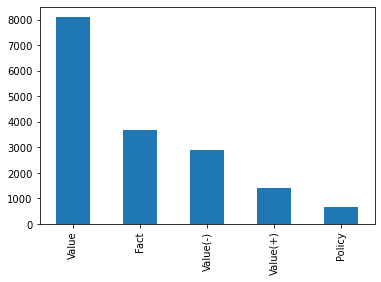

In [5]:
print(train['label'].value_counts())

print(train['label'].value_counts(normalize=True))

train['label'].value_counts().plot(kind='bar')

## Cleanup and normalization

The next step is to cleanup our dataset and normalize some data

#### Removing non-alphabetic chars

Let's start by removing any non-alpha chars, using a regular expression. We'll create a separate corpus (a list of tokens), so that we leave the original dataset untouched.

#### Lowercasing

We can then apply lowercasing, so that words such as *Amazing*, *AMAZING* and *amazing* all have the same representation.

#### Removing stop words

Another common step which is sometimes applied is to remove any stop words (words that do not have domain semantics attached). We can use the stop words list provided in NLTK for English:

#### Stemming

Finally, we can apply stemming to further reduce the size of the vocabulary through normalization.

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
for i in range(0, train['tokens'].size):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', train['tokens'][i])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('portuguese'))])
    corpus.append(review)

print(corpus)

['facto n apena fruto ignor ncia', 'havia humor jornalismo investiga preocupa aprofundar contextualizar hist ria isen relato preocupa social urg ncia denunciar muita pe realment jornal stica', 'tudo c mico fifa', 'todo n s permitimo organiza fa totalment absurdo sentido', 'n fazem rir custa poderoso', 'algu m convenceu devem ter crit rio interess p blico n interess p blico', 'j publicado trabalho jornal stico sobr lado negro fifa', 's infinitament minorit rio', 'toda comunidad jornal stica continua tratar fifa organiza id nea campeonato benigno evento mundo', 'portug morr morr an nimo esquecido calado cansado', 'h discurso pol tico tal preocupa peleja partid ria mera conquista terreno tal indiferen coisa verdadeirament important', 'estatuto estado dentro est dio fifa possui organiza internacion fin lucrativo fing ser', 'ditando lei', 'criando tribunai especiai', 'fugindo todo imposto', 'absorvendo fundo pa se podiam deviam dedicar desenvolvimento combat pobreza', 'acumulando fortuna co